In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
import os

In [4]:
#Load the Times New Roman Font
font_path = '/path/to/your/data/tnr.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# Temperature Data Visualization

<ipython-input-6-ebccd8d97aef>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sensor', y='temp_value_imp', data=combined_df, palette="Set2")


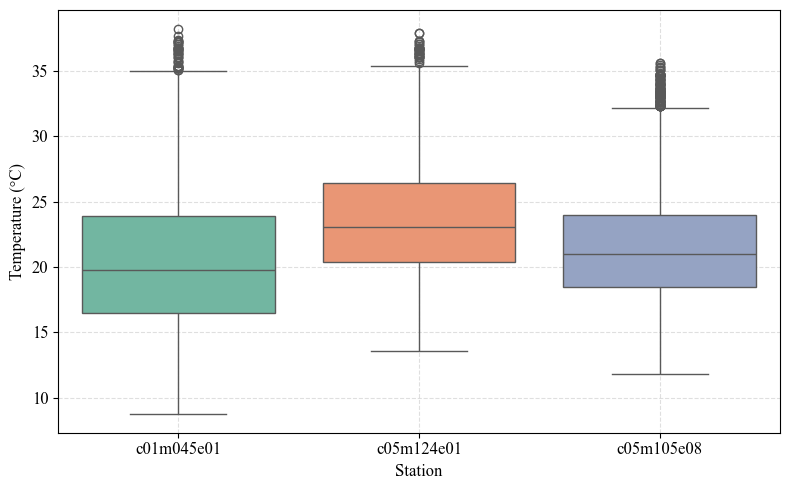

In [6]:
data_folder = '/content/drive/MyDrive/Colab Notebooks/Data/Avamet/Temperature/Imputated_Data_ML_Alg'
file_list = ["c01m045e01_2021.csv", "c05m124e01_2021.csv", "c05m105e08_2021.csv"]

combined_df = pd.DataFrame()

for file_name in file_list:
    df = pd.read_csv(os.path.join(data_folder, file_name))
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.drop_duplicates(subset='timestamp').set_index('timestamp')
    df = df["2021-06-01":"2021-08-31"]
    df['sensor'] = file_name.replace('_2021.csv', '')
    combined_df = pd.concat([combined_df, df[['temp_value_imp', 'sensor']]])

plt.figure(figsize=(8, 5))
sns.boxplot(x='sensor', y='temp_value_imp', data=combined_df, palette="Set2")

# plt.title('Temperature Distribution Across Stations (June–August 2021)', fontsize=8)
plt.xlabel('Station', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("boxplot.png", dpi=300, bbox_inches='tight')
plt.show()

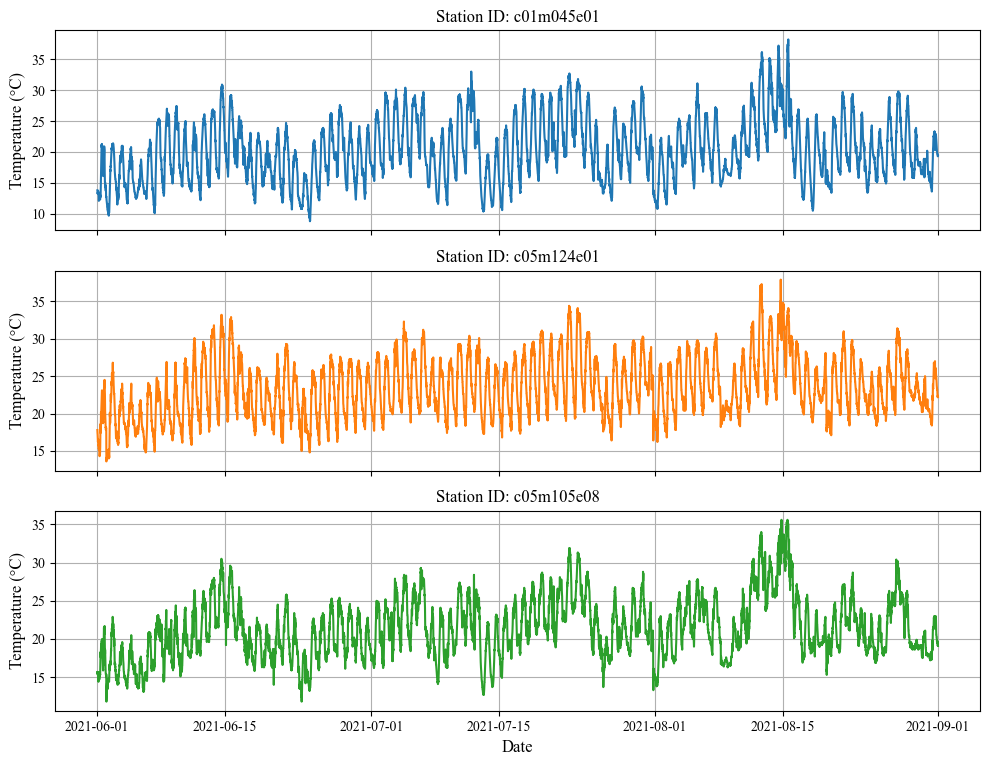

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os

data_folder = '/path/to/your/data/'
file_list = [
    'c01m045e01_2021.csv',
    'c05m124e01_2021.csv',
    'c05m105e08_2021.csv'
]

fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

for i, file_name in enumerate(file_list):
    file_path = os.path.join(data_folder, file_name)
    df = pd.read_csv(file_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.drop_duplicates(subset='timestamp')
    df = df.set_index('timestamp')
    df = df["2021-06-01":"2021-08-31"]

    sensor_id = file_name.replace('_2021.csv', '')
    axs[i].plot(df.index, df['temp_value_imp'], label=sensor_id, color=f"C{i}")
    axs[i].set_title(f"Station ID: {sensor_id}", fontsize=12)
    axs[i].set_ylabel("Temperature (°C)", fontsize=12)
    axs[i].grid(True)

axs[-1].set_xlabel("Date", fontsize=12)
# plt.suptitle("Temperature Trends (June–August 2021)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('temp_visualization.png', dpi=300)
plt.show()


# Gap length = 150

In [ ]:
input_folder = '/path/to/your/data'
output_folder = '/path/to/your/data/plots'

dataframes= []
for filename in os.listdir(input_folder):
    if filename.endswith('.csv'):
        input_path = os.path.join(input_folder, filename)
        print(filename)
        df = pd.read_csv(input_path)
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df = df.set_index('timestamp')
        # Rename columns
        df.columns=[f"{col}_{filename.replace(filename, filename[23:29])}" if col != 'timestamp' else col for col in df.columns]
        dataframes.append(df)

# Merge DataFrames on timestamp
merged_df = pd.concat(dataframes, axis=1, join='inner')
merged_df = merged_df.reset_index()
# merged_df=merged_df.iloc[:,[0,1,3,5,7,9]]  #select relevant columns
merged_df=merged_df.iloc[:,[0,1,2,4,6,9]]  #select relevant columns

# Save to output folder
output_path = os.path.join(output_folder, f"{filename[0:15]}_chart_{filename[20:23]}.csv")
merged_df.to_csv(output_path, index=False)
print(f"Merged file saved to: {output_path}")


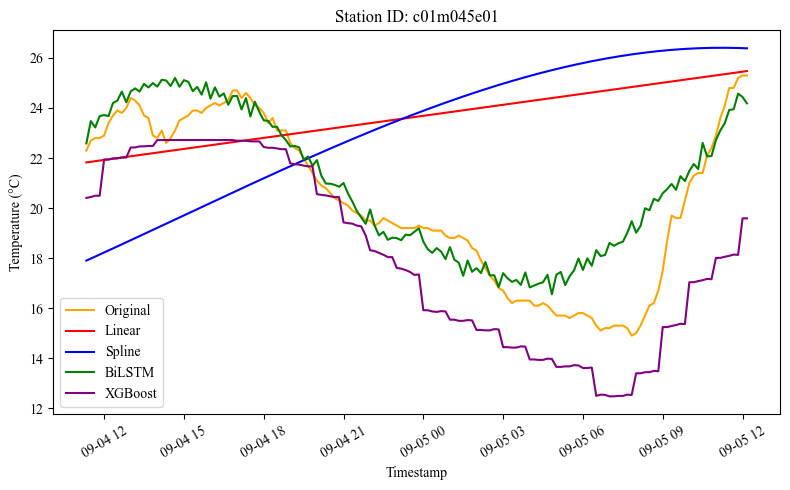

Merged file saved to: /content/drive/MyDrive/Colab Notebooks/Data/Avamet/Temperature/IEEE Charts Latest/150/Final Plots and Data/c01m045e01_imputation_plot_150.png


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(merged_df['timestamp'], merged_df['original_value_xgb.cs'], label='Original', color='orange')
plt.plot(merged_df['timestamp'], merged_df['imputed_value_linear'], label='Linear', color='red')
plt.plot(merged_df['timestamp'], merged_df['imputed_value_spline'], label='Spline', color='blue')
plt.plot(merged_df['timestamp'], merged_df['imputed__bilst'], label='BiLSTM', color='green')
plt.plot(merged_df['timestamp'], merged_df['imputed_value_xgb.cs'], label='XGBoost', color='purple')

# plt.title("Merged Linear and BiLSTM Imputations (Gap Size: 300)")
plt.title(f"Station ID: {filename[0:10]}")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.xticks(rotation=30)
plt.tight_layout()
# plt.savefig(output_path, dpi=300)
output_path = os.path.join(output_folder, f"{filename[0:10]}_imputation_plot_{filename[20:23]}.png")
plt.savefig(output_path, dpi=300)
plt.show()
print(f"Merged file saved to: {output_path}")

# Gap length = 300

In [ ]:
input_folder = '/path/to/your/data'
output_folder = '/path/to/your/data/plots'

dataframes= []
for filename in os.listdir(input_folder):
    if filename.endswith('.csv'):
        input_path = os.path.join(input_folder, filename)
        print(filename)
        df = pd.read_csv(input_path)
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df = df.set_index('timestamp')
        # Rename columns
        df.columns=[f"{col}_{filename.replace(filename, filename[23:29])}" if col != 'timestamp' else col for col in df.columns]
        dataframes.append(df)

# Merging DataFrames on timestamp
merged_df = pd.concat(dataframes, axis=1, join='inner')
merged_df = merged_df.reset_index()
# merged_df=merged_df.iloc[:,[0,1,3,5,7,9]]  #select relevant columns
merged_df=merged_df.iloc[:,[0,1,2,4,6,9]]  #select relevant columns


output_path = os.path.join(output_folder, f"{filename[0:15]}_chart_{filename[20:23]}.csv")
merged_df.to_csv(output_path, index=False)
print(f"Merged file saved to: {output_path}")


In [ ]:
merged_df

,timestamp,original_value_xgb.cs,imputed_value_xgb.cs,imputed_value_linear,imputed_value_spline,imputed__bilst
0,2021-09-04 11:20:00,22.3,20.404087,21.824252,17.493998,22.584310
1,2021-09-04 11:30:00,22.7,20.442078,21.848505,17.562546,23.476192
2,2021-09-04 11:40:00,22.8,20.492506,21.872757,17.631697,23.222286
3,2021-09-04 11:50:00,22.8,20.492506,21.897010,17.701443,23.676131
4,2021-09-04 12:00:00,22.9,21.940205,21.921262,17.771775,23.718789
...,...,...,...,...,...,...
295,2021-09-06 12:30:00,27.8,18.808815,28.978738,30.410352,25.528683
296,2021-09-06 12:40:00,27.9,18.844961,29.002990,30.314287,26.170926
297,2021-09-06 12:50:00,28.3,18.844961,29.027243,30.216495,25.624209
298,2021-09-06 13:00:00,28.8,19.179867,29.051495,30.116969,26.251956


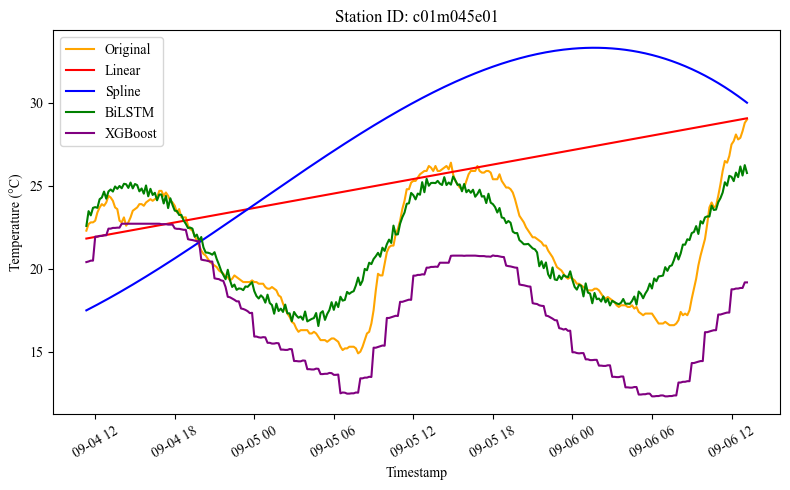

Merged file saved to: /content/drive/MyDrive/Colab Notebooks/Data/Avamet/Temperature/IEEE Charts Latest/300/Final Plots and Data/c01m045e01_imputation_plot_300.png


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(merged_df['timestamp'], merged_df['original_value_xgb.cs'], label='Original', color='orange')
plt.plot(merged_df['timestamp'], merged_df['imputed_value_linear'], label='Linear', color='red')
plt.plot(merged_df['timestamp'], merged_df['imputed_value_spline'], label='Spline', color='blue')
plt.plot(merged_df['timestamp'], merged_df['imputed__bilst'], label='BiLSTM', color='green')
plt.plot(merged_df['timestamp'], merged_df['imputed_value_xgb.cs'], label='XGBoost', color='purple')

# plt.title("Merged Linear and BiLSTM Imputations (Gap Size: 300)")
plt.title(f"Station ID: {filename[0:10]}")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.xticks(rotation=30)
plt.tight_layout()
output_path = os.path.join(output_folder, f"{filename[0:10]}_imputation_plot_{filename[20:23]}.png")
plt.savefig(output_path, dpi=300)
plt.show()
print(f"Merged file saved to: {output_path}")

# Gap length = 450

In [ ]:
input_folder = '/path/to/your/data'
output_folder = '/path/to/your/data/plots'

dataframes= []
for filename in os.listdir(input_folder):
    if filename.endswith('.csv'):
        input_path = os.path.join(input_folder, filename)
        print(filename)
        df = pd.read_csv(input_path)
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df = df.set_index('timestamp')
        # Rename columns
        df.columns=[f"{col}_{filename.replace(filename, filename[23:29])}" if col != 'timestamp' else col for col in df.columns]
        # df.columns = [f"{col}_{filename.replace(filename, filename[24:30])}" if col != 'timestamp' else col for col in df.columns]
        dataframes.append(df)

# Merge all DataFrames on timestamp using outer join
merged_df = pd.concat(dataframes, axis=1, join='inner')
merged_df = merged_df.reset_index()
# merged_df=merged_df.iloc[:,[0,1,3,5,7,9]]  #select relevant columns
merged_df=merged_df.iloc[:,[0,1,2,4,6,9]]  #select relevant columns

# Save to output folder
output_path = os.path.join(output_folder, f"{filename[0:15]}_chart_{filename[20:23]}.csv")
merged_df.to_csv(output_path, index=False)
print(f"Merged file saved to: {output_path}")

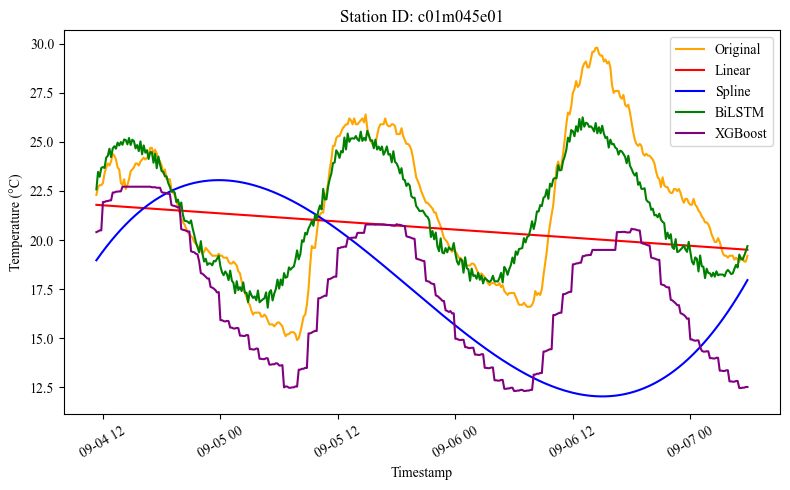

Merged file saved to: /content/drive/MyDrive/Colab Notebooks/Data/Avamet/Temperature/IEEE Charts Latest/450/Final Plots and Data/c01m045e01_imputation_plot_450.png


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(merged_df['timestamp'], merged_df['original_value_xgb.cs'], label='Original', color='orange')
plt.plot(merged_df['timestamp'], merged_df['imputed_value_linear'], label='Linear', color='red')
plt.plot(merged_df['timestamp'], merged_df['imputed_value_spline'], label='Spline', color='blue')
plt.plot(merged_df['timestamp'], merged_df['imputed__bilst'], label='BiLSTM', color='green')
plt.plot(merged_df['timestamp'], merged_df['imputed_value_xgb.cs'], label='XGBoost', color='purple')

# plt.title("Merged Linear and BiLSTM Imputations (Gap Size: 300)")
plt.title(f"Station ID: {filename[0:10]}")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.xticks(rotation=30)
plt.tight_layout()
output_path = os.path.join(output_folder, f"{filename[0:10]}_imputation_plot_{filename[20:23]}.png")
plt.savefig(output_path, dpi=300)
plt.show()
print(f"Merged file saved to: {output_path}")

# Gap length = 600

In [ ]:
input_folder = '/path/to/your/data'
output_folder = '/path/to/your/data/plots'

dataframes= []
for filename in os.listdir(input_folder):
    if filename.endswith('.csv'):
        input_path = os.path.join(input_folder, filename)
        print(filename)
        df = pd.read_csv(input_path)
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df = df.set_index('timestamp')
        # Rename columns
        df.columns=[f"{col}_{filename.replace(filename, filename[23:29])}" if col != 'timestamp' else col for col in df.columns]
        # df.columns = [f"{col}_{filename.replace(filename, filename[24:30])}" if col != 'timestamp' else col for col in df.columns]
        dataframes.append(df)

# Merge all DataFrames on timestamp using outer join
merged_df = pd.concat(dataframes, axis=1, join='inner')
merged_df = merged_df.reset_index()
# merged_df=merged_df.iloc[:,[0,1,3,5,7,9]]  #select relevant columns
merged_df=merged_df.iloc[:,[0,1,2,4,6,9]]  #select relevant columns
# Save to output folder
output_path = os.path.join(output_folder, f"{filename[0:15]}_chart_{filename[20:23]}.csv")
merged_df.to_csv(output_path, index=False)
print(f"Merged file saved to: {output_path}")

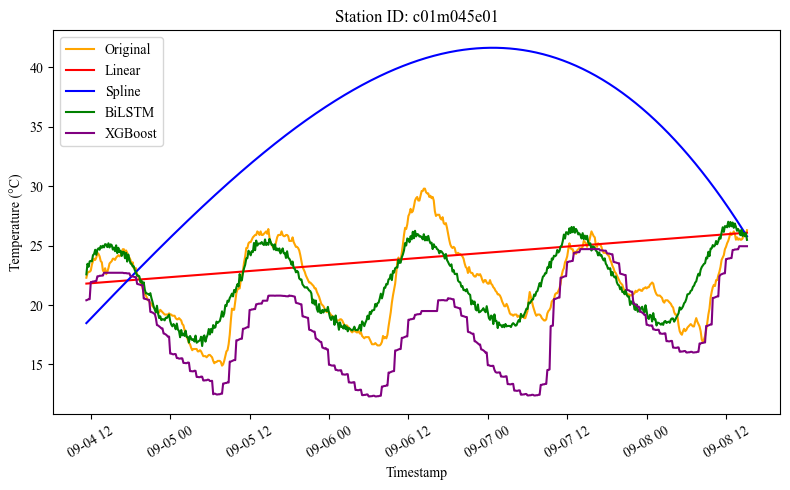

Merged file saved to: /content/drive/MyDrive/Colab Notebooks/Data/Avamet/Temperature/IEEE Charts Latest/600/Final Plots and Data/c01m045e01_imputation_plot_600.png


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(merged_df['timestamp'], merged_df['original_value_xgb.cs'], label='Original', color='orange')
plt.plot(merged_df['timestamp'], merged_df['imputed_value_linear'], label='Linear', color='red')
plt.plot(merged_df['timestamp'], merged_df['imputed_value_spline'], label='Spline', color='blue')
plt.plot(merged_df['timestamp'], merged_df['imputed__bilst'], label='BiLSTM', color='green')
plt.plot(merged_df['timestamp'], merged_df['imputed_value_xgb.cs'], label='XGBoost', color='purple')

# plt.title("Merged Linear and BiLSTM Imputations (Gap Size: 300)")
plt.title(f"Station ID: {filename[0:10]}")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.xticks(rotation=30)
plt.tight_layout()
output_path = os.path.join(output_folder, f"{filename[0:10]}_imputation_plot_{filename[20:23]}.png")
plt.savefig(output_path, dpi=300)
plt.show()
print(f"Merged file saved to: {output_path}")